# Статистический анализ данных 

**Описание проекта**:

Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
 - абонентская плата отсутствует;
 - стоимость одной минуты поездки — 8 рублей;
 - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
 - абонентская плата — 199 рублей в месяц;
 - стоимость одной минуты поездки — 6 рублей;
 - стоимость старта — бесплатно.
 
 

**Описание данных**

В основных данных есть информация о пользователях, их поездках и подписках.

**Пользователи — `users_go.csv`**:
- `user_id` - уникальный идентификатор пользователя
- `name` - имя пользователя
- `age` -	возраст
- `city` - город
- `subscription_type`	- тип подписки (free, ultra)

**Поездки — `rides_go.csv`**: 
- `user_id` - уникальный идентификатор пользователя
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- `duration` - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- `date` - дата совершения поездки

**Подписки — `subscriptions_go.csv`**:
- `subscription_type` - тип подписки
- `minute_price` - стоимость одной минуты поездки по данной подписке
- `start_ride_price` - стоимость начала поездки
- `subscription_fee` - стоимость ежемесячного платежа

**План работы**:

**1. Загрузка данных**
- Считываем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы. 
- Выводим первые строки каждого набора данных и изучаем общую информацию о каждом датафрейме.

**2. Предоработка данных**
- Приводим столбец date к типу даты pandas.
- Создаём новый столбец с номером месяца на основе столбца date.
- Проверяем наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

**3. Исследовательский анализ данных**

Описываем и визуализируем общую информацию о пользователях и поездках:
- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

**4. Объединение данных**
- Объединяем данные о пользователях, поездках и подписках в один датафрейм. 
- Создаём ещё два датафрейма из датафрейма, созданного на этапе 4.1:
 - c данными о пользователях без подписки;
 - с данными о пользователях с подпиской.
- Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

**5. Подсчет выручки**
- Создаём датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- В этот же датафрейм добавляем столбец с помесячной выручкой, которую принёс каждый пользователь. 

**6. Проверка гипотез**
- Проверяем гипотезу - тратят ли пользователи с подпиской больше времени на поездки? 
- Проверяем гипотезу - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
- Проверяем гипотезу - будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
- Определяем какой тест нам понадобится для проверки данной гипотезы: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.

**7. Общий вывод по проекту**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных.


**1.1 Считываю CSV-файлы с данными**

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

**1.2. Изучаю общую информацию о датафрейме**

**Пользователи - `users_go`**

In [3]:
users_go.info()
users_go.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


**Поездки - `rides_go`**

In [4]:
rides_go.info()
rides_go.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


**Подписки - `subscriptions_go`**

In [5]:
subscriptions_go.info()
subscriptions_go.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Вывод по разделу 1**:

В данных:
- `users_go` (пользователи) 1565 записи.
- `rides_go` (поездки) 18068 записи.
- `subscriptions_go` (подписки) 2 записи.
- Пользователи разного возраста и находятся в разных городах. 
- Преобладают пользователи с бесплатным тарифом.
- Наименования данных корректны.
- У столбца date указан некорректный тип данных. 

#### Шаг 2. Предобработка данных

**2.1 Приведём столбец date к типу даты pandas**

In [6]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format = '%Y-%m-%d')
rides_go['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

**2.2 Создадим новый столбец с номером месяца на основе столбца date**

In [7]:
#Проверим за какой период у нас имеются данные
rides_go['date'].dt.year.unique()

array([2021])

In [8]:
rides_go['month'] = rides_go['date'].dt.month
rides_go['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

**2.3 Проверим и обработаем наличие пропущенных значений и дубликатов в датафреймах**

**Пользователи**

In [9]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
users_go.duplicated().sum()

31

In [11]:
users_go.drop_duplicates(inplace=True)
users_go.duplicated().sum()

0

**Поездки**

In [12]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
rides_go.duplicated().sum()

0

**Подписки**

In [14]:
subscriptions_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [15]:
subscriptions_go.duplicated().sum()

0

**Вывод по разделу 2:**
- Привели столбец date к типу даты.
- Добавили столбец month с номером месяца. Данные предоставлены за 2021 год.
- Пропущенных данных в таблицах нет.
- Дубликаты имеются среди пользователей. Удалили строки дубликаты.

#### Шаг 3. Исследовательский анализ данных

**3.1 Частота встречаемости городов**

In [16]:
users_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

**Вывод**:
Самое большое количество пользователей находятся в Пятигорске, а самое маленькое в Москве.  

**3.2 Соотношение пользователей с подпиской и без подписки**

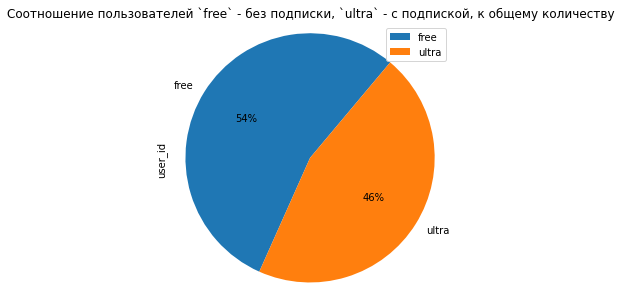

In [17]:
(
    users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .plot.pie(y='user_id', figsize=(5,5), autopct='%1.0f%%', startangle=50, 
    title='Соотношение пользователей `free` - без подписки, `ultra` - с подпиской, к общему количеству')

)
plt.axis('equal')
plt.show()

**Вывод**: 
Количество пользователей без подписки (free) - 54%, превышает количество пользователей с подпиской (ultra) - 46%.

**3.3 Возраст пользователей**

Самые младшие и старшие пользователи

In [18]:
users_go['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

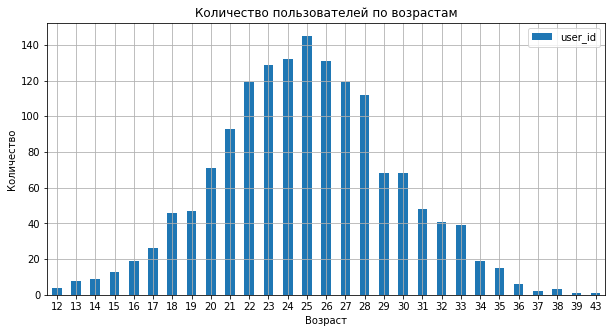

In [19]:
(
    users_go.pivot_table(index='age', values='user_id', aggfunc='count').sort_values(by='age', ascending=True)
    .plot(kind='bar' , grid=True, figsize=(10, 5))
)
plt.title('Количество пользователей по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation = 0)
plt.show()

**Вывод**:
- Самые младшие пользователи - 12 лет.
- Самые старшие пользователи - 43 года.
- Средний возраст пользователей - 25 лет.

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

Самые короткие и длинные дистанции за одну поездку

In [20]:
rides_go['distance'].describe().round(2)

count    18068.00
mean      3070.66
std       1116.83
min          0.86
25%       2543.23
50%       3133.61
75%       3776.22
max       7211.01
Name: distance, dtype: float64

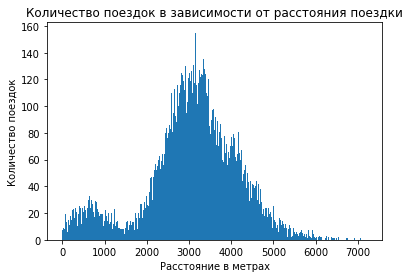

In [21]:
plt.hist(rides_go['distance'], bins=500, range=(0,7211))
plt.title('Количество поездок в зависимости от расстояния поездки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

<AxesSubplot:>

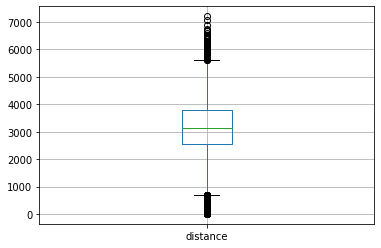

In [22]:
rides_go.boxplot(column = 'distance')

**Вывод**:
- Самая короткая дистанция - 0.86 км.
- Самая длинная - 7.2 км.
- В основном пользователи проезжают от 2.5 км до 4 км.
- Прослеживаются выбросы примерно в диапазоне <900 и >5800

**3.5 Продолжительность поездок** 

Самые короткие и долгие поездки

In [23]:
rides_go['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

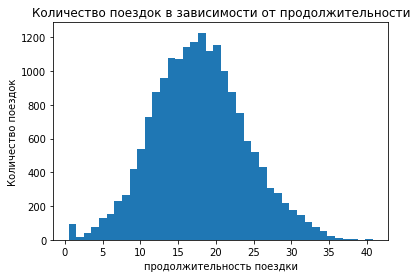

In [24]:
plt.hist(rides_go['duration'], bins=40)
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

<AxesSubplot:>

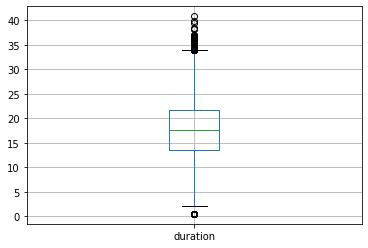

In [25]:
rides_go.boxplot(column = 'duration')

**Вывод**:
- Самые короткие поездки - по пол минуты. 
- Самая длинная поездка - 40 минут.
- В основном длительность поездки состовляет от 13 до 22 минут.
- Прослеживаются выбросы примерно <2 и >34 

**Вывод по разделу 3**:

**Частота встречаемости городов**:
- Самое большое количество пользователей находятся в Пятигорске, а самое маленькое в Москве.

**Соотношение пользователей с подпиской и без подписки**:
- Количество пользователей без подписки (free) - 54%, превышает количество пользователей с подпиской (ultra) - 46%.

**Возраст пользователей**:
- Самые младшие пользователи - 12 лет.
- Самые старшие пользователи - 43 года.
- Средний возраст пользователей - 25 лет.

**Расстояние, которое пользователь преодолел за одну поездку**:
- Самая короткая дистанция - 0.86 км.
- Самая длинная - 7.2 км.
- В основном пользователи проезжают от 2.5 км до 4 км.
- Прослеживаются выбросы примерно в диапазоне <900 и >5800

**Продолжительность поездок**:
- Самые короткие поездки - по пол минуты
- Самая длинная поездка - 40 минут.
- В основном длительность поездки состовляет от 13 до 22 минут.
- Прослеживаются выбросы примерно <2 и >34

#### Шаг 4. Объединение данных 

**4.1 Объединяем данные о пользователях, поездках и подписках в один датафрейм**

In [26]:
data = users_go.merge(rides_go)

In [27]:
data = data.merge(subscriptions_go)

In [28]:
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [29]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [30]:
data.isnull().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**4.2.1 Создаём датафрейм с данными о пользователях без подписки**

In [31]:
data_free = data[data['subscription_type'] == 'free']
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [32]:
data_free['duration'].describe()

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

In [33]:
data_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

**4.2.2 Создаём датафрейм с данными о пользователях с подпиской**

In [34]:
data_ultra = data[data['subscription_type'] == 'ultra']
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [35]:
data_ultra['duration'].describe()

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

In [36]:
data_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

**4.3.1 Визуализируем информацию о расстоянии и времени поездок для пользователей без подписки**

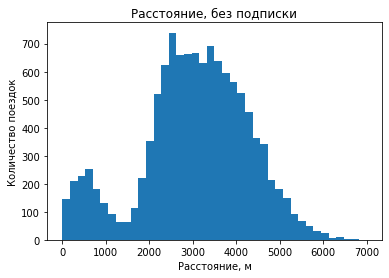

<Figure size 1440x1440 with 0 Axes>

In [37]:
plt.hist(data_free['distance'], bins=40, range = (0, 7000))
plt.title('Расстояние, без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

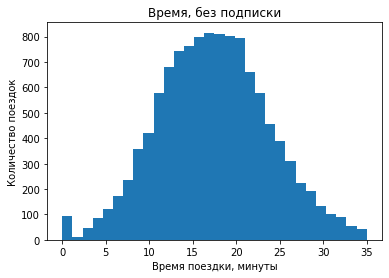

<Figure size 1440x1440 with 0 Axes>

In [38]:
plt.hist(data_free['duration'], bins=30, range = (0, 35))
plt.title('Время, без подписки')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

**4.3.2 Визуализируем информацию о расстоянии и времени поездок для пользователей с подпиской**

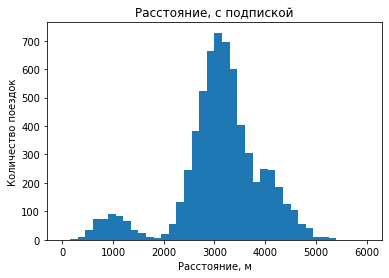

<Figure size 1440x1440 with 0 Axes>

In [39]:
plt.hist(data_ultra['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние, с подпиской')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

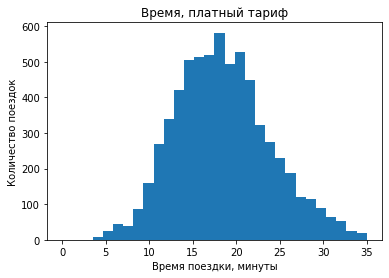

<Figure size 1440x1440 with 0 Axes>

In [40]:
plt.hist(data_ultra['duration'], bins=30, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.figure(figsize=(20,20))
plt.show()

**Вывод по разделу 4**:

- Объединили данные о пользователях, поездках и тарифах в один датафрейм - data.
- Создали два датафрейма на основе data:
data_free - с данными о пользователях без подписки.
data_ultra - с данными о пользователях с подпиской.

- Визуализировали информацию о расстоянии и времени для пользователей обеих категорий:

Для пользователей без подписки - время поездки составляет от 12 до 22 минут, и проезжают от 2 до 4 км.

Для пользователей с подпиской - время поездки составляет от 14 до 22 минут, пик расстояния приходится на 2 до 3,5 км.

Таким образом, можно сделать вывод, что пользователи без подписки в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи с подпиской.   

#### Шаг 5. Подсчёт выручки

**5.1 Создаём датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдём суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц** 

In [41]:
data['duration'] = np.ceil(data['duration']) 
total_data = data.pivot_table(
    index=('user_id', 'month'), 
    values=(
        'distance', 
        'duration', 
        'minute_price', 
        'start_ride_price', 
        'subscription_fee',
        'subscription_type'
    ), 
    aggfunc=({'distance':{'count', 'sum'}, 
             'duration':'sum',
             'minute_price': 'mean',
             'start_ride_price':'mean',
             'subscription_fee':'mean',
             'subscription_type':'min'})
)

total_data.columns = [
    'count', 'distance', 
    'duration', 
    'minute_price',
    'start_ride_price',
    'subscription_fee',
    'subscription_type'
]

total_data.head()

count     distance  duration  minute_price  start_ride_price  \
user_id month                                                                 
1       1          2  7027.511294      42.0             6                 0   
        4          1   754.159807       7.0             6                 0   
        8          2  6723.470560      46.0             6                 0   
        10         2  5809.911100      32.0             6                 0   
        11         3  7003.499363      56.0             6                 0   

               subscription_fee subscription_type  
user_id month                                      
1       1                   199             ultra  
        4                   199             ultra  
        8                   199             ultra  
        10                  199             ultra  
        11                  199             ultra

**5.2 В этот же датафрейм добавляем столбец с помесячной выручкой, которую принёс каждый пользователь**

In [42]:
total_data['revenue_per_month'] = (
total_data['start_ride_price']*total_data['count']+
total_data['minute_price']*total_data['duration']+
total_data['subscription_fee'])

total_data.head(10)

count      distance  duration  minute_price  start_ride_price  \
user_id month                                                                  
1       1          2   7027.511294      42.0             6                 0   
        4          1    754.159807       7.0             6                 0   
        8          2   6723.470560      46.0             6                 0   
        10         2   5809.911100      32.0             6                 0   
        11         3   7003.499363      56.0             6                 0   
        12         2   6751.629942      28.0             6                 0   
2       3          3  10187.723006      63.0             6                 0   
        4          2   6164.381824      40.0             6                 0   
        6          1   3255.338202      14.0             6                 0   
        7          2   6780.722964      48.0             6                 0   

               subscription_fee subscription_type  revenue_per_month  
user_id month                                                         
1       1                   199             ultra              451.0  
        4                   199             ultra              241.0  
        8                   199             ultra              475.0  
        10                  199             ultra              391.0  
        11                  199             ultra              535.0  
        12                  199             ultra              367.0  
2       3                   199             ultra              577.0  
        4                   199             ultra              439.0  
        6                   199             ultra              283.0  
        7                   199             ultra              487.0

**Вывод по разделу 5**:

- Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (data).
- Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Добавили столбец с помесячной выручкой, которую принес каждый пользователь.

#### Шаг 6. Проверка гипотез

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки?**

Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Выдвинем гипотезы:

- Н0: Время пользователей на подписке ultra равно времени пользователей на подписке free
- H1: Время пользователей на подписке ultra больше времени пользователей на подписке free

In [43]:
print('Среднее значение продолжительности поездок для категории ultra:', data_ultra['duration'].mean())
print('Среднее значение продолжительности поездок для категории free:', data_free['duration'].mean())

alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'],  
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    

Среднее значение продолжительности поездок для категории ultra: 18.54198516280583
Среднее значение продолжительности поездок для категории free: 17.39090929866399
p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод**:
Нулевая гипотеза отвергнута. 
Соответственно, пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. 

**6.2 Оптимальное растояние поездки с точки зрения износа самоката для пользователей с подпиской**

Оптимальное расстояние одной поездки - 3130 метров

Гипотеза - пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

Выдвинем гипотезы:

- Н0: Расстояние пользователей с подпиской равно 3130 м.
- H1: Расстояние пользователей с подпиской больше 3130 м.

In [44]:
distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    data_ultra['distance'], 
    distance,
    alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод**:
Не получилось отвергнуть нулевую гипотезу. Можно сделать вывод о том, что с большой долей вероятности пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.

**6.3 Определим, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

Выдвинем гипотезы:

- Н0: Выручка пользователей c подпиской равна выручке пользователей без подписки 
- H1: Выручка пользователей с подпиской больше выручки пользователей без подписки

In [45]:
alpha = 0.05

results = st.ttest_ind(
    total_data.loc[total_data['subscription_fee'] > 0, 'revenue_per_month'], 
    total_data.loc[total_data['subscription_fee'] == 0, 'revenue_per_month'],  
    alternative='greater')
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод**:
Нулевая гипотеза отвергнута, выручка пользователей с подпиской больше выручки пользователей без подписки.

**6.4 Представляю такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест мне понадобился бы для проверки этой гипотезы?**

**Ответ**:

Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.
- Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

Это две зависимые выборки (парные).
- Некоторая переменная измеряется дважды (количество обращений до обновления и после него) для одних и тех же объектов (пользователей) и они одинаковы по размеру. 

**Вывод по разделу 6**:
- 6.1 Нулевая гипотеза отвергнута. Соответственно, пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- 6.2 Не получилось отвергнуть нулевую гипотезу. Можно сделать вывод о том, что с большой долей вероятности пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
- 6.3 Нулевая гипотеза отвергнута, выручка пользователей с подпиской больше выручки пользователей без подписки.
- 6.4 Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок. Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel().

**Общий вывод по всей работе**:

**1. Загрузка данных**:

В данных:
- `users_go` (пользователи) 1565 записи.
- `rides_go` (поездки) 18068 записи.
- `subscriptions_go` (подписки) 2 записи.
- Пользователи разного возраста и находятся в разных городах.
- Преобладают пользователи с бесплатным тарифом.
- Наименования данных корректны.
- У столбца date указан некорректный тип данных.

**2. Предоработка данных**:

- Привели столбец date к типу даты.
- Добавили столбец month с номером месяца. Данные предоставлены за 2021 год.
- Пропущенных данных в таблицах нет.
- Дубликаты имеются среди пользователей. Удалили строки дубликаты.

**3. Исследовательский анализ данных**:

Частота встречаемости городов:
- Самое большое количество пользователей находятся в Пятигорске, а самое маленькое в Москве.

Соотношение пользователей с подпиской и без подписки:
- Количество пользователей без подписки (free) - 54%, превышает количество пользователей с подпиской (ultra) - 46%.

Возраст пользователей:
- Самые младшие пользователи - 12 лет.
- Самые старшие пользователи - 43 года.
- Средний возраст пользователей - 25 лет.

Расстояние, которое пользователь преодолел за одну поездку:
- Самая короткая дистанция - 0.86 км.
- Самая длинная - 7.2 км.
- В основном пользователи проезжают от 2.5 км до 4 км.
- Прослеживаются выбросы примерно в диапазоне <900 и >5800

Продолжительность поездок:
- Самые короткие поездки - по пол минуты. Значение странное, возможно техническая ошибка самоката или пользователь передумал ехать.
- Самая длинная поездка - 40 минут.
- В основном длительность поездки состовляет 13 - 22 минут.
- Прослеживаются выбросы примерно <2 и >34

**4. Объединение данных**:

- Объединили данные о пользователях, поездках и тарифах в один датафрейм - data.
- Создали два датафрейма на основе data:
data_free - с данными о пользователях без подписки.
data_ultra - с данными о пользователях с подпиской.

- Визуализировали информацию о расстоянии и времени для пользователей обеих категорий:

Для пользователей без подписки - время поездки составляет от 12 до 22 минут, и проезжают от 2 до 4 км.

Для пользователей с подпиской - время поездки составляет от 14 до 22 минут, пик расстояния приходится на 2 до 3,5 км.

Таким образом, можно сделать вывод, что пользователи без подписки в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи с подпиской.   


**5. Подсчёт выручки**:

- Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (data).
- Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
- Добавили столбец с помесячной выручкой, которую принес каждый пользователь.

**6. Проверка гипотез**: 

- 6.1 Нулевая гипотеза отвергнута. Соответственно, пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
- 6.2 Не получилось отвергнуть нулевую гипотезу. Можно сделать вывод о том, что с большой долей вероятности пользователи с подпиской проезжают расстояние, не превышающее 3130 метров за одну поездку.
- 6.3 Нулевая гипотеза отвергнута, выручка пользователей с подпиской больше выручки пользователей без подписки.
- 6.4 Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок. Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel().